## Data Analysis Project - Abalone Age Prediction

Welcome to my data analysis project! In this project, we will explore the fascinating world of abalones, a type of marine mollusk, as we investigate how their physical characteristics can help us predict their age.

The dataset used in this project is known as the "Abalone Dataset." It was originally derived from observations of abalones, a type of marine mollusk, conducted by marine biologists. These biologists collected data on abalones over time as part of their research studies. It contains detailed information about abalones, including physical measurements such as length, diameter, height, and weight. The target variable for this study is the age of abalones, which is traditionally estimated by counting the rings on their shells, but we will explore ways to predict age from physical characteristics.

The original dataset can be found on the [UCI Machine Learning Repository page](https://archive.ics.uci.edu/dataset/1/abalone), which is a renowned source of datasets for machine learning research. It is publicly available for use in data analysis and machine learning projects.

This dataset presents an exciting opportunity to explore the physical characteristics of abalones and build models that can predict their age based on these features. Feel free to explore, learn, and, of course, contribute your insights throughout this project. Let's dive into the world of abalones!

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
import custom_functions as hm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [1]:
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
abalone = pd.read_csv("abalone.csv", names=column_names, header=0)
abalone

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Initial data exploration

In this section, we conduct an initial exploratory data analysis (EDA) of our Abalone dataset. EDA is the crucial first step in understanding the dataset, its characteristics, and potential insights.

#### Age column

The dataset itself suggests that you consider the abalone Age to be its number of rings plus 1.5, so let's create a column with this operation.

In [2]:
abalone['Age'] = abalone['Rings'] + 1.5

#### Basic information

In [3]:
print("Dataset Shape:", abalone.shape)

print("\nColumn Data Types")
print(abalone.dtypes)

Dataset Shape: (4177, 10)

Column Data Types
Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
Age              float64
dtype: object


#### Dataset first glance

In [4]:
abalone.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


#### Summary statistics

In [5]:
abalone.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


#### Missing data

In [6]:
missing_data = abalone.isnull().sum()
missing_data

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
Age              0
dtype: int64

#### Unique values

In [7]:
print("Column | Unique Values Count\n")

for column in abalone.columns:
    unique_values_total = abalone[column].nunique()
    print(f"{column} | {unique_values_total}")

Column | Unique Values Count

Sex | 3
Length | 134
Diameter | 111
Height | 51
WholeWeight | 2429
ShuckedWeight | 1515
VisceraWeight | 880
ShellWeight | 926
Rings | 28
Age | 28


In [8]:
abalone['Sex'].replace({'M': 'Male', 'F': 'Female', 'I': 'Infant'}, inplace=True)
sex_counts = abalone['Sex'].value_counts()

print("Distribution of 'Sex' Column\n")
print(sex_counts)

Distribution of 'Sex' Column

Male      1528
Infant    1342
Female    1307
Name: Sex, dtype: int64


#### Correlation heatmap

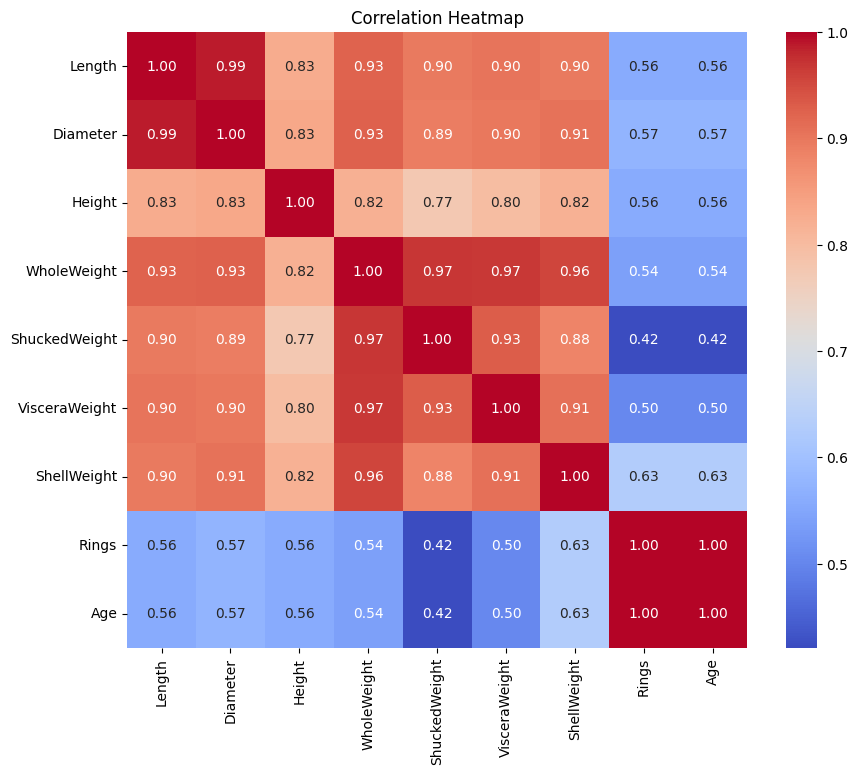

In [9]:
plt.figure(figsize=(10, 8))
correlation_matrix = abalone.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Pairwise scatterplot

c:\Users\Mantovani\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


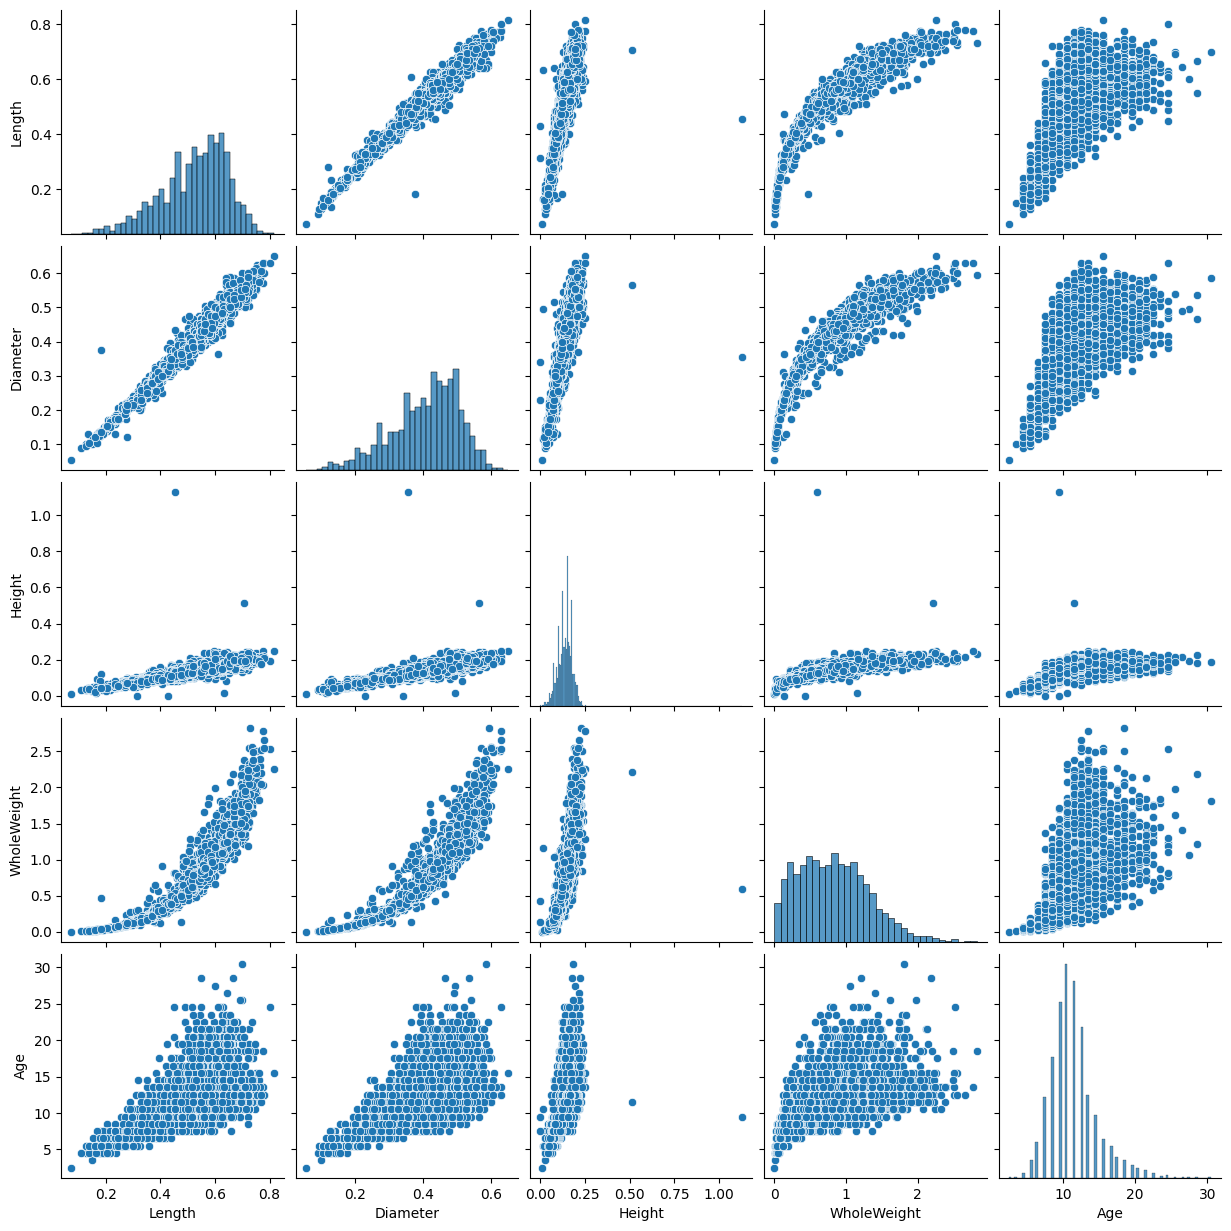

In [10]:
sns.pairplot(abalone[['Length', 'Diameter', 'Height', 'WholeWeight', 'Age']])
plt.show()

### Data distribution

#### Sex

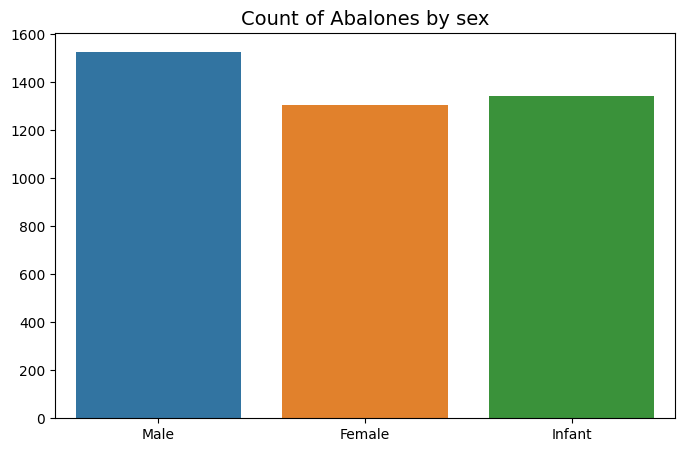

In [11]:
# Create a count plot for the distribution of "Sex"
plt.figure(figsize=(8, 5))
sns.countplot(data=abalone, x='Sex')
plt.title('Count of Abalones by sex', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Rings

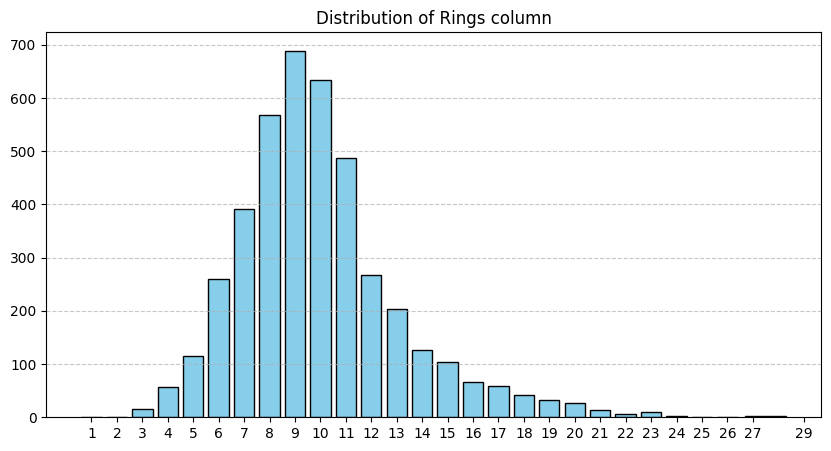

In [12]:
unique_values = np.unique(abalone['Rings'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Rings'], bins=unique_values - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Rings column')
plt.xlabel('')
plt.ylabel('')
plt.xticks(unique_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Diameter

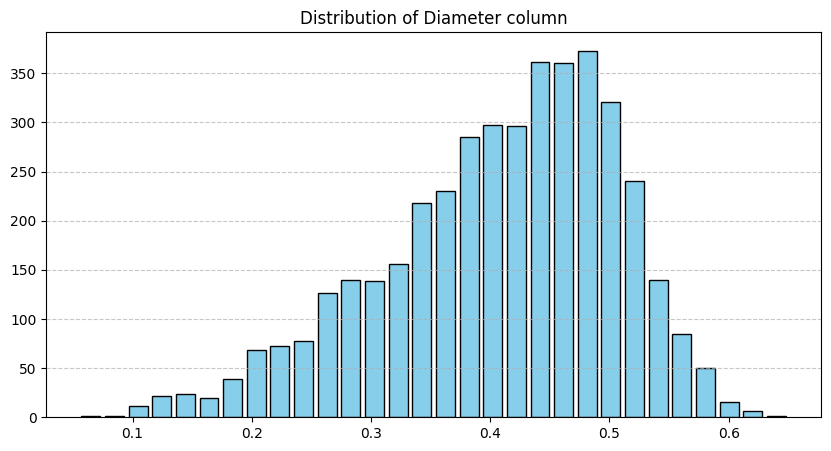

In [13]:
unique_values = np.unique(abalone['Diameter'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Diameter'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Diameter column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Length

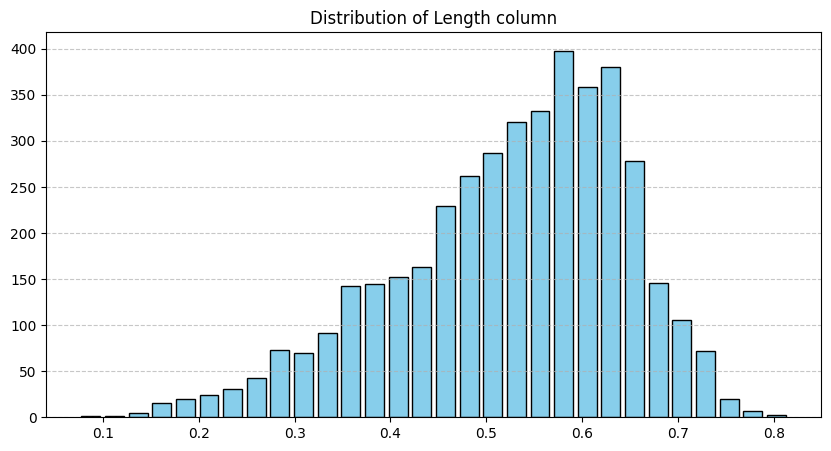

In [14]:
unique_values = np.unique(abalone['Length'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Length'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Length column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Height

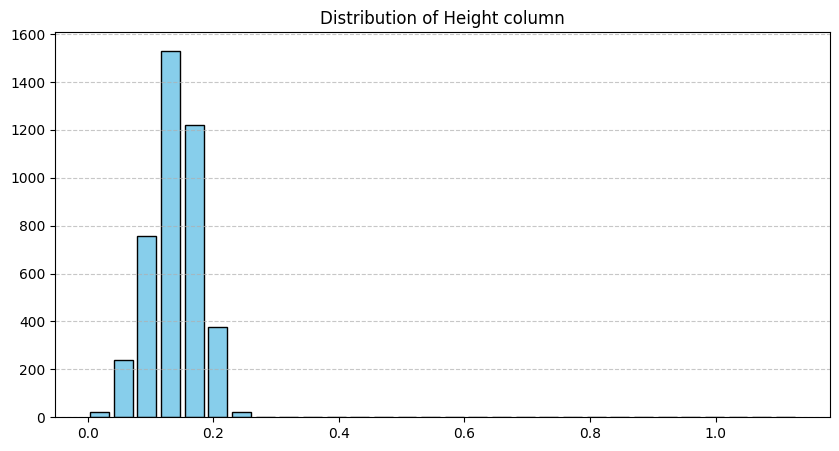

In [15]:
unique_values = np.unique(abalone['Height'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Height'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Height column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

There seems to be some clear outliers here, with at least 1 abalone surpassing the 1.0 mark. Let's use some quick math to check for outliers **above** the upper bound.

In [16]:
adults = abalone[(abalone['Sex'] != 'Infant')]

Q1 = adults['Height'].quantile(0.25)
Q3 = adults['Height'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = adults[(adults['Height'] > upper_bound)].sort_values(by='Height', ascending=False)
outliers = hm.highlight_columns(outliers, columns_to_color=['Height'])
outliers

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Age
2051,Female,0.455000,0.355000,1.130000,0.594000,0.332000,0.116000,0.133500,8,9.500000
1417,Male,0.705000,0.565000,0.515000,2.210000,1.107500,0.486500,0.512000,10,11.500000
1428,Female,0.815000,0.650000,0.250000,2.255000,0.890500,0.420000,0.797500,14,15.500000
1763,Male,0.775000,0.630000,0.250000,2.779500,1.348500,0.760000,0.578000,12,13.500000
2179,Female,0.595000,0.470000,0.250000,1.283000,0.462000,0.247500,0.445000,14,15.500000
277,Male,0.610000,0.500000,0.240000,1.642000,0.532000,0.334500,0.690000,18,19.500000
307,Male,0.645000,0.515000,0.240000,1.541500,0.471000,0.369000,0.535000,13,14.500000
1528,Male,0.725000,0.575000,0.240000,2.210000,1.351000,0.413000,0.501500,13,14.500000
2161,Female,0.715000,0.565000,0.240000,2.199500,0.724500,0.465000,0.885000,17,18.500000
506,Male,0.560000,0.460000,0.235000,0.839500,0.332500,0.157000,0.305000,12,13.500000


There are indeed two clear outliers, with the biggest Abalone having its Height set as 1.13! Let's focus on the two tallest Abalones. The bigger one is a female Abalone. Even though its Height is more than twice the second highest value, its Weight doesn't follow the logic. This seems to be a measurement error. The Male one may also be an error because it's twice as big as the third highest measurement, but weighs less than 2 smaller Abalones. We'll definitely review this later when we check for outliers to remove before training a model.

### Data visualization

#### Violin Plot of Age vs. Sex

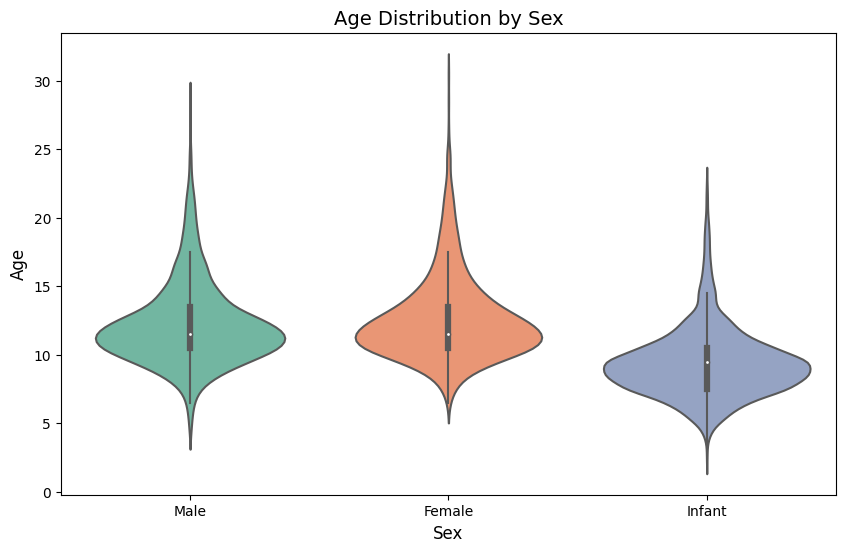

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Age', palette='Set2')
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

#### Violin Plot of Length vs. Sex

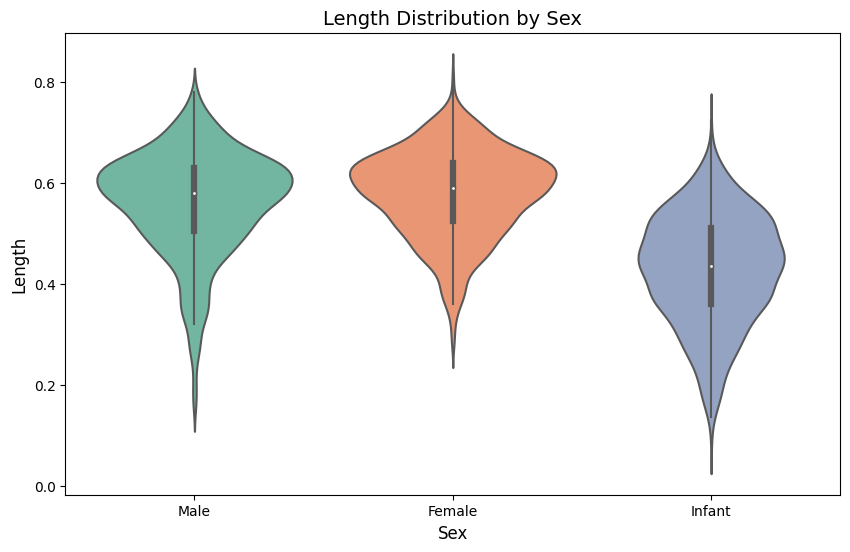

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Length', palette='Set2')
plt.title('Length Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.show()

#### Violin Plot of Diameter vs. Sex

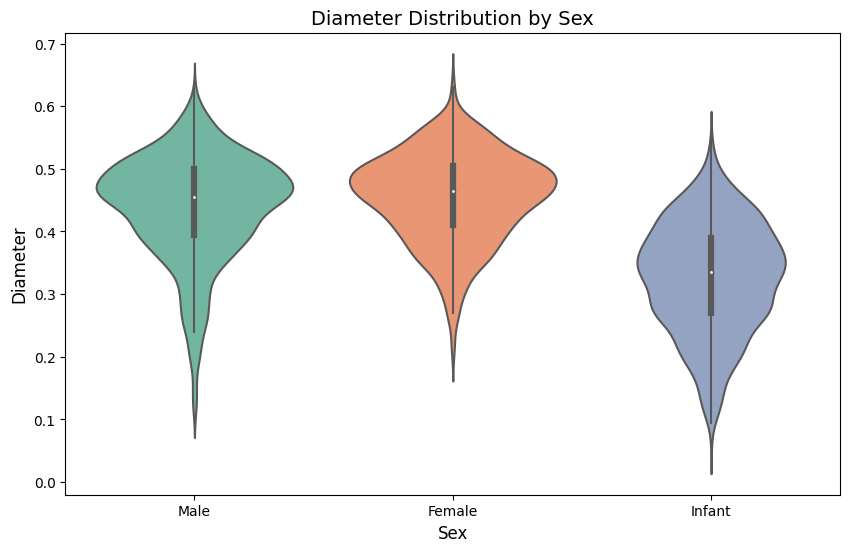

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Diameter', palette='Set2')
plt.title('Diameter Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Diameter', fontsize=12)
plt.show()

#### Violin Plot of Weight vs. Sex

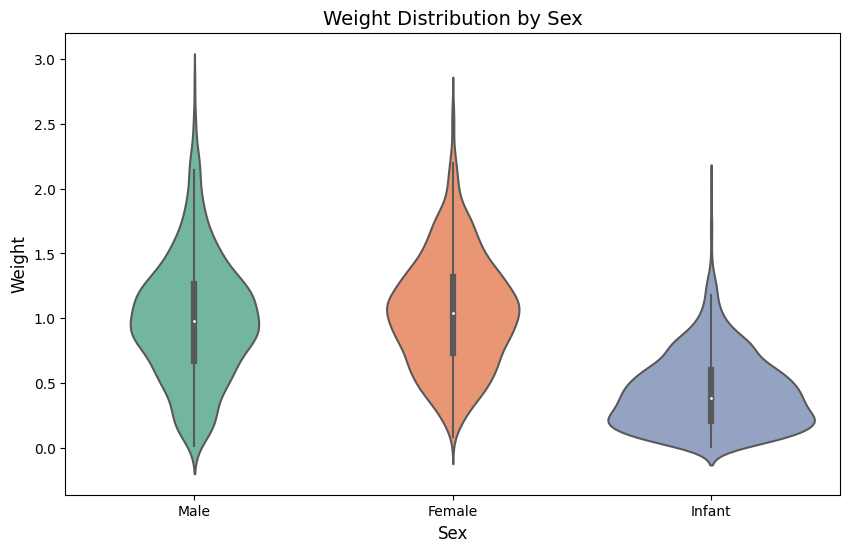

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='WholeWeight', palette='Set2')
plt.title('Weight Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.show()

## Predicting the Abalones age

### Splitting into features and target

In [109]:
x = abalone.drop(['Age', 'Sex'], axis=1)
y = abalone['Age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

### Training the models

In [110]:
models = []
model_names = []
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

# Decision Trees
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
models.append(("Decision Tree", dt_model))

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
models.append(("Random Forest", rf_model))

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)
models.append(("Gradient Boosting", gb_model))

# Support Vector Machines
svm_model = SVR()
svm_model.fit(x_train, y_train)
models.append(("Support Vector Machines", svm_model))

### Evaluating the models

Model: Decision Tree
Mean Absolute Error: 0.0035885167464114833
Mean Squared Error: 0.005980861244019139
Root Mean Squared Error: 0.07733602811121824
R-squared: 0.9994801390739909


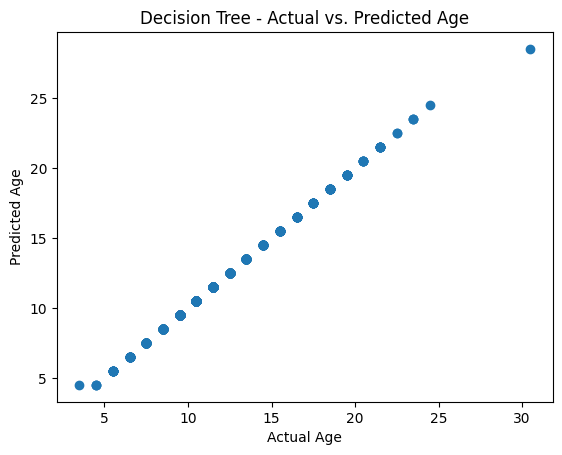

Model: Random Forest
Mean Absolute Error: 0.004569377990430628
Mean Squared Error: 0.010897846889952155
Root Mean Squared Error: 0.1043927530528444
R-squared: 0.9990527510095003


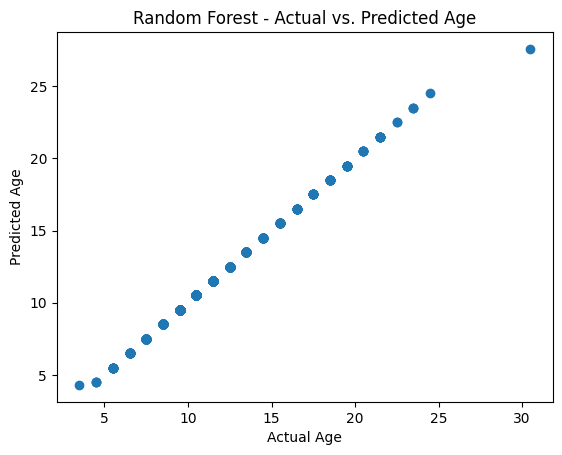

Model: Gradient Boosting
Mean Absolute Error: 0.003648916272797034
Mean Squared Error: 0.005865351369236429
Root Mean Squared Error: 0.07658558199319523
R-squared: 0.9994901792785731


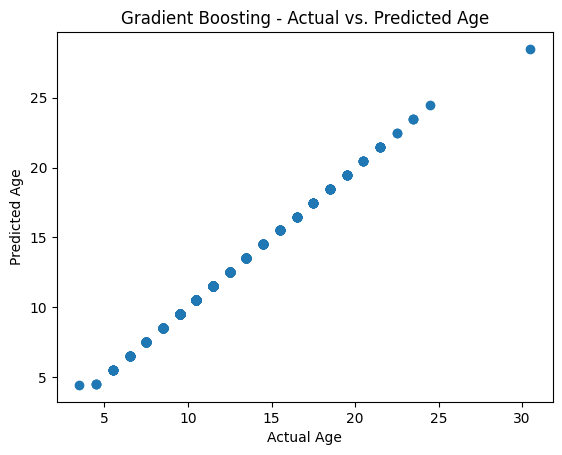

Model: Support Vector Machines
Mean Absolute Error: 0.06537869338733769
Mean Squared Error: 0.0668374744899988
Root Mean Squared Error: 0.2585294460791629
R-squared: 0.9941904368011835


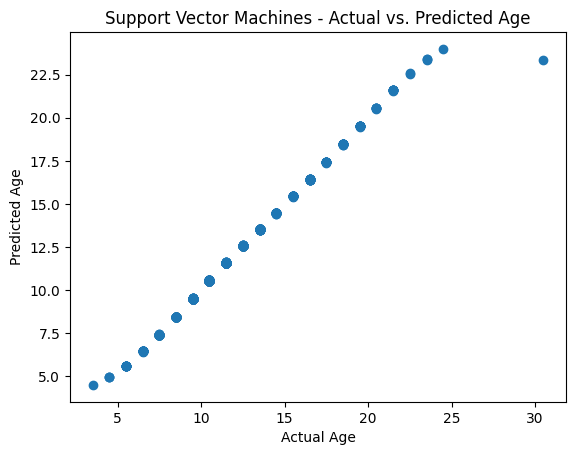

In [111]:
for model_name, model in models:
    y_pred = model.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)

    # Append the metrics to the lists
    model_names.append(model_name)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(round(r2*100, 5))

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Age")
    plt.ylabel("Predicted Age")
    plt.title(f"{model_name} - Actual vs. Predicted Age")
    plt.show()

### Model metrics summary

In [112]:
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2': r2_values})

metrics_df.sort_values(by='R2', ascending=False)

,Model,MAE,MSE,RMSE,R2
2,Gradient Boosting,0.003649,0.005865,0.076586,99.94902
0,Decision Tree,0.003589,0.005981,0.077336,99.94801
1,Random Forest,0.004569,0.010898,0.104393,99.90528
3,Support Vector Machines,0.065379,0.066837,0.258529,99.41904


### Modelling conclusion

**Gradient Boosting** and **Decision Trees** exhibit outstanding performance with remarkably low errors and high R-squared values. Both models achieve very low Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating precise predictions and minimal variance. The Root Mean Squared Error (RMSE) for these models is also quite low, signifying accurate predictions with limited spread. Moreover, both models have exceptionally high R-squared values (close to 1), indicating that they capture a significant portion of the target variable's variance.

**Random Forest** delivers a good performance but falls slightly behind the **Decision Trees** and **Gradient Boosting** models. While the MAE, MSE, and RMSE are higher than the former two models, they are still relatively low, suggesting reasonably accurate predictions. The R-squared value is also high, signifying a good fit to the data.

**Support Vector Machines (SVM)**, although the MAE/MSE/RMSE values are considerably higher than the other models, still provides a decent performance. The R-squared value is lower than the other models, indicating that SVM captures less variance in the target variable compared to the ensemble methods.

In summary, **Gradient Boosting** and **Decision Trees** appear to be clearly the most promising models for predicting the age of abalones in this dataset. They offer the lowest errors and the best goodness of fit. Random Forest also performs well, making it a reasonable alternative. Support Vector Machines, while delivering acceptable results, lag behind the ensemble models in terms of prediction accuracy. It's essential to consider both the metrics and the specific goals and requirements of your project when choosing the most suitable model.

### Stacking Ensemble Model

As we saw before, we have two really strong models in **"Decision Tree"** and **"Gradient Boosting"** and we can't easily tell which one of these is best. Because of this, we are going to combine them to try and improve our metrics. This is why we implement a **stacking ensemble model**, a technique that amalgamates the predictive prowess of multiple models to enhance overall performance.

The ensemble model, a **Decision Tree** in this case, takes center stage as the top-level orchestrator. It utilizes the predictions from the base models to make the final predictions. This Decision Tree aggregates insights from the base models and provides the ensemble's output. The stacking ensemble is established using the **StackingRegressor** from scikit-learn, with the base models and ensemble model defined. It serves as a meta-model that harmonizes the collaboration of the base models, receiving their predictions and combining them into a unified prediction.

Following the ensemble's creation, it is trained on the training data. During this training process, the ensemble learns to optimally weigh and integrate the predictions from the base models to enhance its predictive performance, effectively leveraging the strengths of each model. Once trained, the stacking ensemble is prepared to make predictions. It applies the collective wisdom of the base models and the ensemble model to generate predictions on the test data.

In [113]:
# Define the base models
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=21)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=21))
]

# Define the ensemble model
ensemble_model = DecisionTreeRegressor(random_state=42)

# Create the stacking ensemble
stacking_model = StackingRegressor(estimators=base_models, final_estimator=ensemble_model)

# Train the stacking ensemble on the training data
stacking_model.fit(x_train, y_train)

# Make predictions with the stacking ensemble
ensemble_predictions = stacking_model.predict(x_test)

mae = mean_absolute_error(y_test, ensemble_predictions)
mse = mean_squared_error(y_test, ensemble_predictions)
rmse = mean_squared_error(y_test, ensemble_predictions, squared=False)
r2 = r2_score(y_test, ensemble_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.0029904306220095694
Mean Squared Error: 0.005083732057416268
Root Mean Squared Error: 0.0713002949321829
R-squared: 0.9995581182128922


### Updating the metrics dataframe

In [114]:
ensemble = {
    'Model': 'Stacking Ensemble', 
    'MAE': mae, 
    'MSE': mse, 
    'RMSE': rmse, 
    'R2': round(r2*100, 5)
}

metrics = metrics_df.append(ensemble, ignore_index=True)
metrics.sort_values(by='R2', ascending=False)

C:\Users\Mantovani\AppData\Local\Temp\ipykernel_14856\2464181543.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics_df.append(ensemble, ignore_index=True)


,Model,MAE,MSE,RMSE,R2
4,Stacking Ensemble,0.002990,0.005084,0.071300,99.95581
2,Gradient Boosting,0.003649,0.005865,0.076586,99.94902
0,Decision Tree,0.003589,0.005981,0.077336,99.94801
1,Random Forest,0.004569,0.010898,0.104393,99.90528
3,Support Vector Machines,0.065379,0.066837,0.258529,99.41904


### Cross-validation K-folds

In [130]:
folds = 10

# Perform k-fold cross-validation for the ensemble_model
mse_scores = cross_val_score(ensemble_model, x_train, y_train, cv=folds, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(ensemble_model, x_train, y_train, cv=folds, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
rmse_scores = (-mse_scores) ** 0.5  # Convert back to RMSE
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print(f"Cross-Validation RMSE (k={folds}):")
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

print(f"\nCross-Validation R-squared (k={folds}):")
print("Mean R-squared:", mean_r2)
print("Standard Deviation of R-squared:", std_r2)

Cross-Validation RMSE (k=10):
Mean RMSE: 0.030908792129878637
Standard Deviation of RMSE: 0.041693687922716105

Cross-Validation R-squared (k=10):
Mean R-squared: 0.9997472900229518
Standard Deviation of R-squared: 0.0004098526209410999
